In [1]:
%pylab inline
from sklearn.datasets import make_classification,make_circles
from sklearn import datasets
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


# Regresión Logística.            
Para este laboratorio usaremos un dataset de flores que contiene medidas de los pétalos para hacer una clasificación en tres tipos de flores.

In [2]:
iris = datasets.load_iris()

### 1. `DESCR`.
Para obtener algo de información sobre los datos usaremos algunos comandos útiles.

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### 2. Dataframe.
A partir de los datos construimos un dataframe.

In [4]:
Data = pd.DataFrame({'sepal length':iris.data.T[0], 'sepal width':iris.data.T[1], 
                     'petal length':iris.data.T[2], 'petal width':iris.data.T[3]
                     ,'target':iris.target})

In [5]:
Data.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 3. Reetiquetado.
Para hacer más accesible el dataset, renombramos las columnas en el estádar *Pascal case*.

In [6]:
columns_name =[ "".join([c.capitalize() for c in cols.split()])  for cols in Data.columns ]
columns_name =[col.replace("(" ,"_") for col in columns_name ] 
cols = [col.replace(")" ,"") for col in columns_name ]
Data.columns = cols
Data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 4. Más información del dataset.

Una descripción estadística de las columnas es dada por `descrie`.

In [7]:
Data.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [8]:
#Cantidad de valores por columnas.
Data.count()

SepalLength    150
SepalWidth     150
PetalLength    150
PetalWidth     150
Target         150
dtype: int64

In [9]:
#Cantidad de valores nulos por columnas.
Data.isnull().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Target         0
dtype: int64

### 5. Gráficas de los datos.

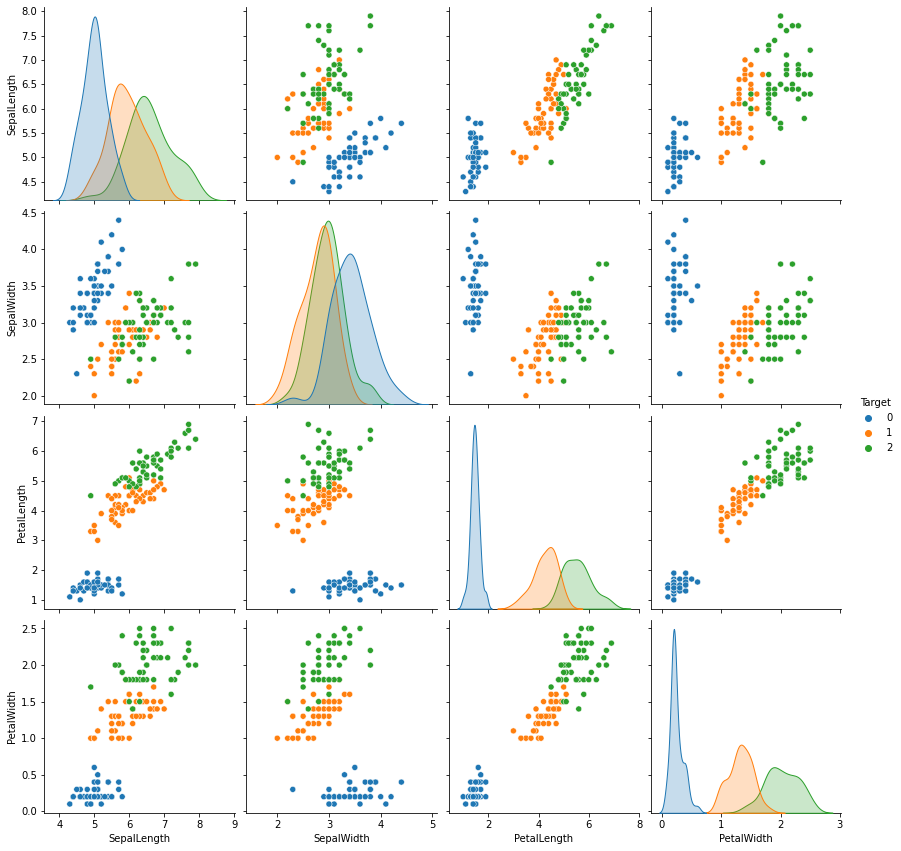

In [10]:
sns.pairplot(Data, hue="Target", height=3, palette='tab10')

Las gráficas en la diagonal muestra las distriuciones de cada característica, lo que ayuda a visualizar posibles fronteras de decisión para clasificar. Los diagramas por fuera de la diagonal muestra cómo se distriuyen los datos depediendo de un par de características, vemos que se forman cúmulos de putos de colores definidos, indicado la facilida de clasificación de los datos.

### 6. Matriz de correlación.

<AxesSubplot:>

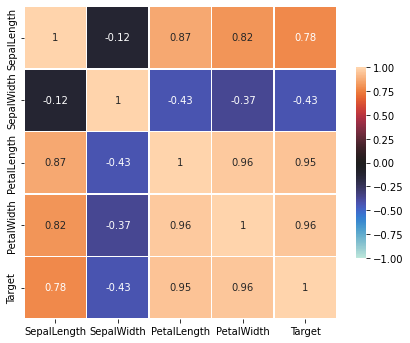

In [11]:
corr = Data[list(Data.columns[:5])].corr()
plt.figure(figsize=(7,7))
sns.heatmap(corr, vmin=-1.0, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

Dentro de las características identificamos fuerte correlación entre:
* *PetalWidth* y *PetalLength*
* *PetalLength* y *SepalLength*
* *PetalWidth* y *SepalLength*

Mientras que *SepalWidth* presenta una correlación moderada con *PetalLength* y *PetalWidth*; además *SepalWidth* y *SepalLength* tienen una nula correlación.

### Preprocesamiento.
Vamos a añadir tres columnas asociando a un cojunto de características con la pertenencia a una de las tres categorías.

In [12]:
def Relabel(x, label):
    nlabel = np.ones(len(x))
    for i in range(len(x)):
        if x[i]==label:
            nlabel[i] = 0
            
    return nlabel

In [13]:
targA = Relabel(Data.Target, 0)
targB = Relabel(Data.Target, 1)
targC = Relabel(Data.Target, 2)

Data['TargetA'] = targA
Data['TargetB'] = targB
Data['TargetC'] = targC
Data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Target,TargetA,TargetB,TargetC
0,5.1,3.5,1.4,0.2,0,0.0,1.0,1.0
1,4.9,3.0,1.4,0.2,0,0.0,1.0,1.0
2,4.7,3.2,1.3,0.2,0,0.0,1.0,1.0
3,4.6,3.1,1.5,0.2,0,0.0,1.0,1.0
4,5.0,3.6,1.4,0.2,0,0.0,1.0,1.0


Y vamos a normalizar los valores numéricos usando la media y la desviación estándar de cada columa.

In [14]:
normData = pd.DataFrame()

In [15]:
for i in range(len(Data.columns)):
    name = Data.columns[i]
    col = Data[Data.columns[i]]
    if i < 4:
        normData[name]= (col - col.mean())/col.std()
    else:
        normData[name] = col

In [16]:
normData.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Target,TargetA,TargetB,TargetC
0,-0.897674,1.015602,-1.335752,-1.311052,0,0.0,1.0,1.0
1,-1.139200,-0.131539,-1.335752,-1.311052,0,0.0,1.0,1.0
2,-1.380727,0.327318,-1.392399,-1.311052,0,0.0,1.0,1.0
3,-1.501490,0.097889,-1.279104,-1.311052,0,0.0,1.0,1.0
4,-1.018437,1.245030,-1.335752,-1.311052,0,0.0,1.0,1.0


In [17]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)
normData.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Target,TargetA,TargetB,TargetC
count,150.0000,150.0000,150.0000,150.0000,150.0000,150.0000,150.0000,150.0000
mean,-0.0000,-0.0000,-0.0000,-0.0000,1.0000,0.6667,0.6667,0.6667
std,1.0000,1.0000,1.0000,1.0000,0.8192,0.4730,0.4730,0.4730
min,-1.8638,-2.4258,-1.5623,-1.4422,0.0000,0.0000,0.0000,0.0000
25%,-0.8977,-0.5904,-1.2225,-1.1799,0.0000,0.0000,0.0000,0.0000
50%,-0.0523,-0.1315,0.3354,0.1321,1.0000,1.0000,1.0000,1.0000
75%,0.6722,0.5567,0.7602,0.7880,2.0000,1.0000,1.0000,1.0000
max,2.4837,3.0805,1.7799,1.7064,2.0000,1.0000,1.0000,1.0000


### 7. Separación en training y test sets.
Empezaremos por hacer una clasificación en las clases *setosa* y *no setosa*.

In [18]:
from sklearn import model_selection
split = model_selection.StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(normData, normData["TargetA"]): 
    strat_train_set = normData.loc[train_index] 
    strat_test_set = normData.loc[test_index]

In [19]:
strat_train_set

,SepalLength,SepalWidth,PetalLength,PetalWidth,Target,TargetA,TargetB,TargetC
8,-1.7430,-0.3610,-1.3358,-1.3111,0,0.0000,1.0000,1.0000
144,1.0345,0.5567,1.1001,1.7064,2,1.0000,1.0000,0.0000
119,0.1892,-1.9670,0.7036,0.3945,2,1.0000,1.0000,0.0000
31,-0.5354,0.7862,-1.2791,-1.0487,0,0.0000,1.0000,1.0000
19,-0.8977,1.7039,-1.2791,-1.1799,0,0.0000,1.0000,1.0000
...,...,...,...,...,...,...,...,...
132,0.6722,-0.5904,1.0434,1.3128,2,1.0000,1.0000,0.0000
3,-1.5015,0.0979,-1.2791,-1.3111,0,0.0000,1.0000,1.0000
122,2.2422,-0.5904,1.6666,1.0504,2,1.0000,1.0000,0.0000
143,1.1553,0.3273,1.2134,1.4440,2,1.0000,1.0000,0.0000


### 8. Contrucción del Modelo.

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
X_data = strat_train_set[strat_train_set.columns[:4]]
y_data = strat_train_set['TargetA']
clf = LogisticRegression(random_state=0).fit(X_data, y_data)

In [22]:
from sklearn.metrics import accuracy_score
score_train = clf.score(X_data, y_data)

X_test = strat_test_set[strat_test_set.columns[:4]]
y_test = strat_test_set['TargetA']
predict = clf.predict(X_test)
score_test = accuracy_score(y_test,predict)

print("Train score: {}\nTest score: {}".format(score_train,score_test))

Train score: 1.0
Test score: 1.0


### 9. Frontera de decisión.
Para un conjunto de datos de entrada en un rango determinado, se determina su probabilidad de pertenecer o no a la clase *setosa*.

In [23]:
X_new = np.linspace(-10, 10, 1000).reshape(250, 4)#Generamos los valores de X_new
prob = clf.predict_proba(X_new)

In [24]:
decision_boundary = X_new[prob[:, 0] >= 0.5][0]
decision_boundary

array([-10.        ,  -9.97997998,  -9.95995996,  -9.93993994])

### 10. Gráfica de la regresión.

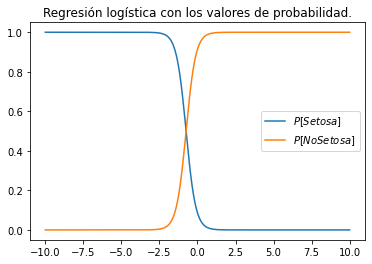

In [25]:
axisval = np.linspace(-10, 10, 250)
plt.title("Regresión logística con los valores de probabilidad.")
plt.plot(axisval, prob.T[0], label = "$P[Setosa]$")
plt.plot(axisval, prob.T[1], label = "$P[NoSetosa]$")
plt.legend()
plt.show()

### 11. Multiclasificador.
Ahora usamos un modelo para la clasificación en tres categorías.

In [26]:
X_data_mul = strat_train_set[strat_train_set.columns[:4]]
y_data_mul = strat_train_set['Target']
mul_clf = LogisticRegression(random_state=0)

In [27]:
mul_clf.fit(X_data_mul, y_data_mul)
score_train_mul = mul_clf.score(X_data_mul, y_data_mul)

X_test_mul = strat_test_set[strat_test_set.columns[:4]]
y_test_mul = strat_test_set['Target']
predict_mul = clf.predict(X_test_mul)
score_test_mul = accuracy_score(y_test_mul,predict_mul)

print("Train score: {}\nTest score: {}".format(score_train_mul,score_test_mul))

Train score: 0.9666666666666667
Test score: 0.6666666666666666


### 12. Ejemplo.
Intentamos clasificar una flor con las siguientes características $x=[4.9,5.0, 1.8, 0.3]$.

In [30]:
ej_x = [4.9,5.0, 1.8, 0.3]

#Normalizando las características.
norm_x = [0,0,0,0]
for i in range(len(ej_x)):
    col = Data[Data.columns[i]]
    norm_x[i] = (ej_x[i] - col.mean())/col.std()
    
ej_x, norm_x

([4.9, 5.0, 1.8, 0.3],
 [-1.1392004834649543,
  4.4570243990053156,
  -1.1091610262276925,
  -1.1798594716002149])

In [51]:
pred_ej = mul_clf.predict_proba([norm_x])
classes = ['Setosa','Versicolour','Virginica']
out = ['Probabilidad de ser '+classes[i]+': '+str(round(pred_ej[0][i],4)) for i in range(0,3)]
print(*out, sep='\n')

Probabilidad de ser Setosa: 0.9999
Probabilidad de ser Versicolour: 0.0001
Probabilidad de ser Virginica: 0.0
